In [1]:
%pylab inline
import xarray as xr
import glob
from mpl_toolkits.basemap import Basemap
# import xarray as xr

def loadRastaflt(szi):
#     matlabpath='/data/mcfarq/a/szhu28/research/HIWC/10_150901Wholeflight/src/analysis/example/data/'
    rastafn=glob.glob(datapath+'*_F'+str(szi)+'_*.nc')
    return xr.open_dataset(rastafn[0])

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy.io as sio    # For .mat version before 7.3
import h5py    # For .mat version after 7.3
import pandas as pd
matlabpath='/data/mcfarq/a/szhu28/research/HIWC/10_150901Wholeflight/src/analysis/example/data/'
datapath='/data/mcfarq/a/szhu28/research/HIWC/data/fulldataDarwin/RASTA/data/'
filenames=np.array(['processed.mat','rawFIT.mat','rawPSD.mat','rawVAR.mat'])
'''
for szi in range(4):
    tmpfn=matlabpath+filenames[szi]
    try:
        raw=h5py.File(tmpfn,'r')
#         print('hdf '+str(szi))
        raw.close()
    except:
        raw=sio.loadmat(tmpfn)
#         raw=sio.whosmat(tmpfn)
#         varnames=raw.items()
'''
raw=sio.loadmat(matlabpath+filenames[3])
proc=sio.loadmat(matlabpath+filenames[0])
proc['indpsdforward']-=1                     ############ PYTHON VS MATLAB
proc['indpsdback']-=1

### 5 seconds running mean of iwc
tmpiwc=pd.DataFrame(raw['TWCIKPZRgm3'].ravel())
iwc_mean=tmpiwc.rolling(window=5,center=True,min_periods=3).mean().as_matrix()

In [ ]:
# Each flight template
'''
totaln=23
for i in range(totaln):
# for i in range(12,14):
        szi=i+1
        
        ### For PSD data
        indflt=(raw['flightnum']==szi) & (iwc_mean>1.5)
        tmp = proc['indpsdforward'][indflt]
        tmp = tmp[~np.isnan(tmp)].astype(int)
        #### Need to convert to int otherwise float as index is not acceptable
        mmd = proc['MMD'][ tmp ]
        #### squeeze the dimension otherwise it will create a 3-D array.
        time = raw['Time'][ np.squeeze(proc['indpsdback'][tmp]) ]
        
        ### For RASTA data
        try:
            ds = loadRastaflt(szi).sel(method='nearest',time=np.squeeze(time/3600.),tolerance=1./3600)
        except:
            continue
            pass

        ax=plt.gca()
        ax.legend(tmpmmd.astype(int).astype(str),loc='best')
        plt.ylabel('Altitude (km)')
        plt.xlabel('Updraft (m/s)')
        plt.title('Flight '+str(szi)+' updraft IWC cases '+str(len(mmd)))
        plt.plot(plt.xlim(),np.array([0,0]),'k--')
        plt.plot(np.array([0,0]),plt.ylim(),'k--')
        plt.show()
'''

/net/san-a1-ib/data/keeling/a/szhu28/usr/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in greater


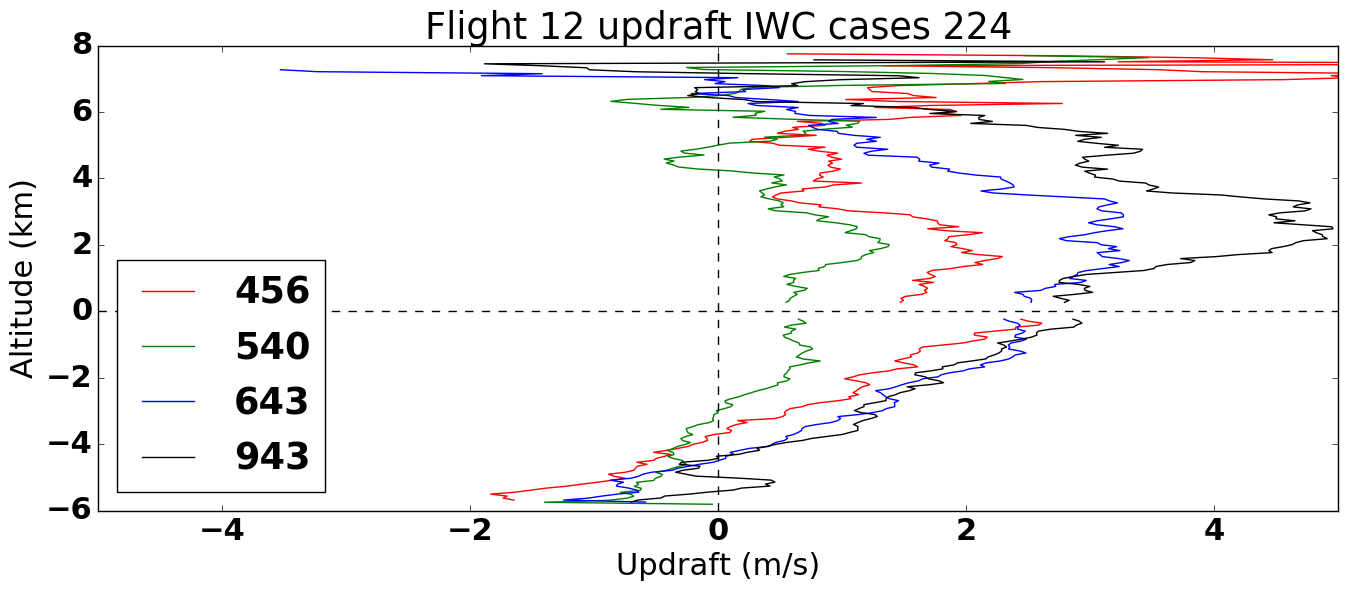

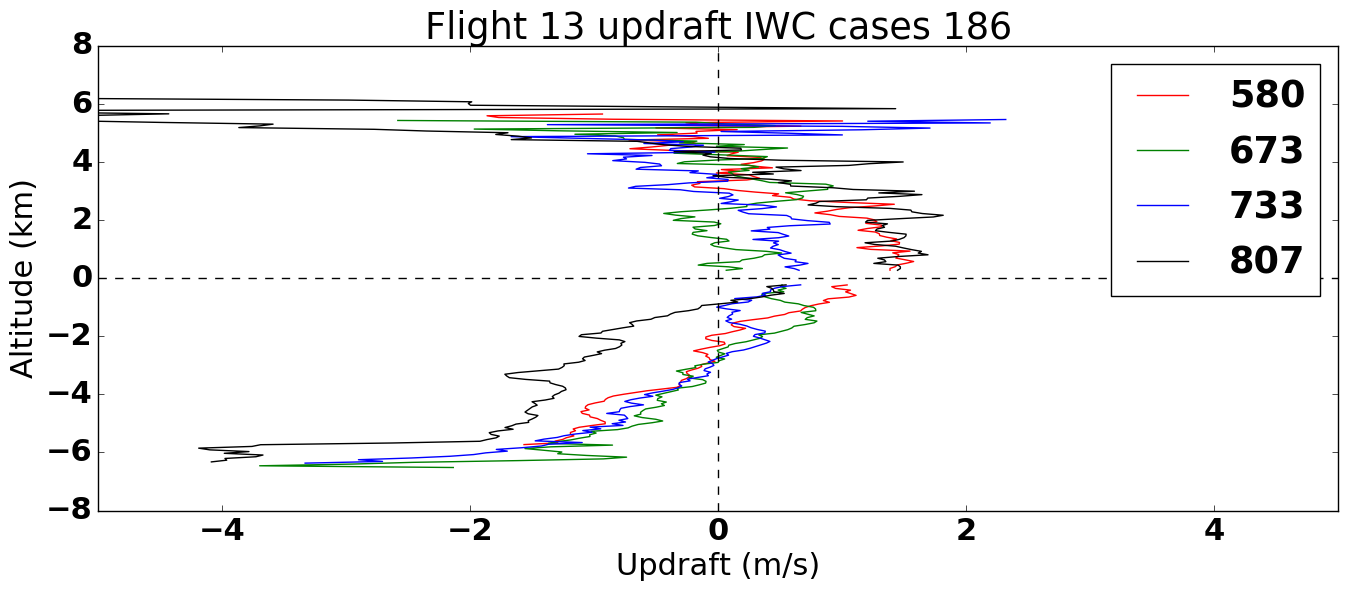

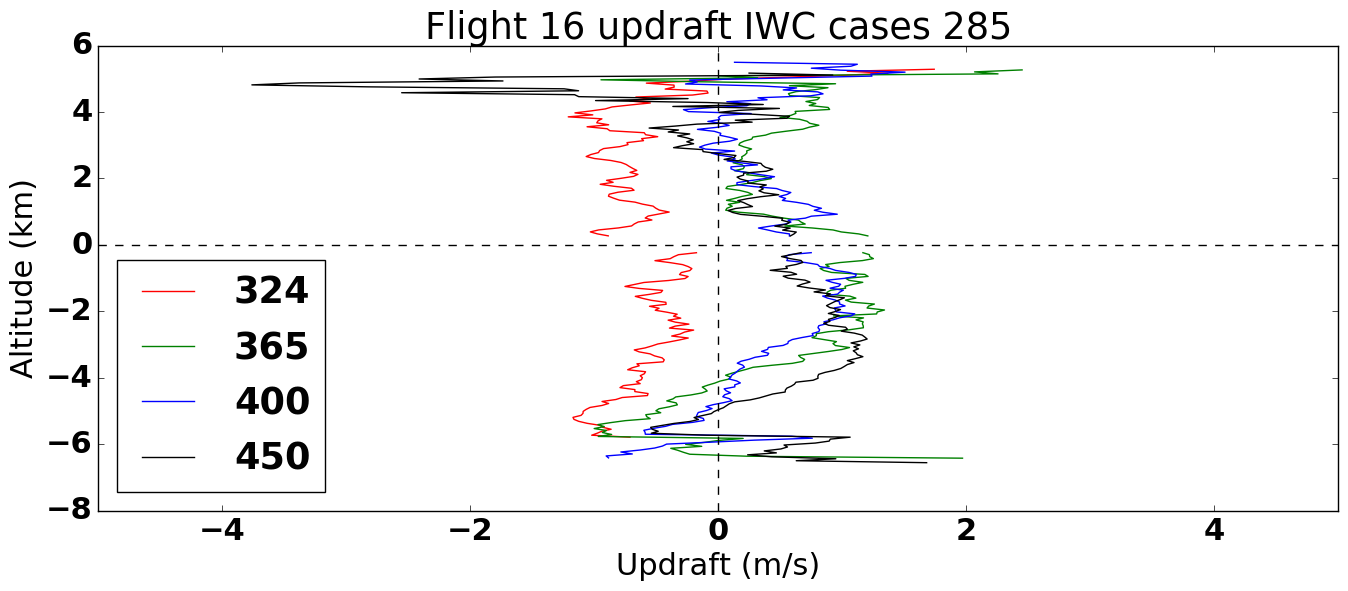

In [8]:
# grouped w wind profile by MMD cats
totaln=23
cbindbackward=cbmmd=np.zeros([0,1])
cbalt=cbupdf=np.ndarray([500,0])
# for i in range(totaln):
for i in [11,12,15]:
        szi=i+1
        
        ### For PSD data
        indflt=(raw['flightnum']==szi) & (iwc_mean>1.5)
        tmp = proc['indpsdforward'][indflt]
        tmp = tmp[~np.isnan(tmp)].astype(int)
        #### Need to convert to int otherwise float as index is not acceptable
        mmd = proc['MMD'][ tmp ]
        #### squeeze the dimension otherwise it will create a 3-D array.
        time = raw['Time'][ np.squeeze(proc['indpsdback'][tmp]) ]
        
        ### For RASTA data
        try:
            ds = loadRastaflt(szi).sel(method='nearest',time=np.squeeze(time/3600.),tolerance=1./3600)
        except:
            continue
            pass
#         updf=ds.w_ret.where((ds.Mask_Vz==1) | (ds.Mask_Vz==3))
        if np.prod(ds.w_ret.shape) == 0:
            continue;
        updf = ds.w_ret.where(ds.Mask_Vz==1).values.transpose()
        alt = ds.height_2D.values.transpose()
        if updf.ndim == 1:
            updf=updf[:,np.newaxis]
            alt=alt[:,np.newaxis]
            time=time[np.newaxis,:]
            
        alt = alt-alt[249,:]
        
        fig=figure(figsize=[16,6])
        mmdbins = np.percentile(mmd, np.arange(0,100.1,25))
        mmdind = np.digitize(mmd,mmdbins)

        tmpc=np.array(['r','g','b','k'])
        tmpmmd=np.zeros(len(mmdbins)-1)
        for j in range(1,len(mmdbins)):
            tmpind=np.in1d(mmdind,j)
            x1=updf[:,tmpind]
            y1=alt[:,tmpind]
            x0=np.nanmean(x1,axis=1)
            y0=np.nanmean(y1,axis=1)
            tmpmmd[j-1]=np.nanmean(mmd[tmpind])
        #             plot(x0,y0,c=colormapping.to_rgba(tmpmmd[j-1]))
            plot(x0,y0,c=tmpc[j-1])

        ax=plt.gca()
        ax.legend(tmpmmd.astype(int).astype(str),loc='best')
        plt.ylabel('Altitude (km)')
        plt.xlabel('Updraft (m/s)')
        plt.xlim(-5,5)
        plt.title('Flight '+str(szi)+' updraft IWC cases '+str(len(mmd)))
        plt.plot(plt.xlim(),np.array([0,0]),'k--')
        plt.plot(np.array([0,0]),plt.ylim(),'k--')
        plt.show()

/net/san-a1-ib/data/keeling/a/szhu28/usr/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in greater


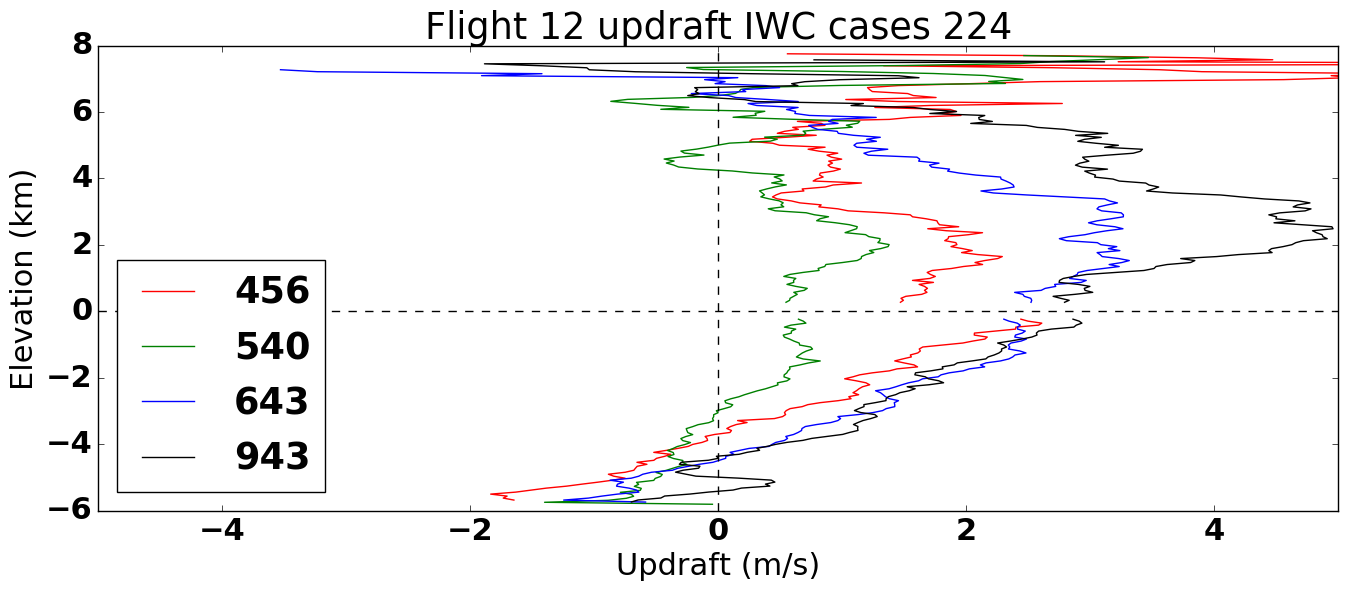

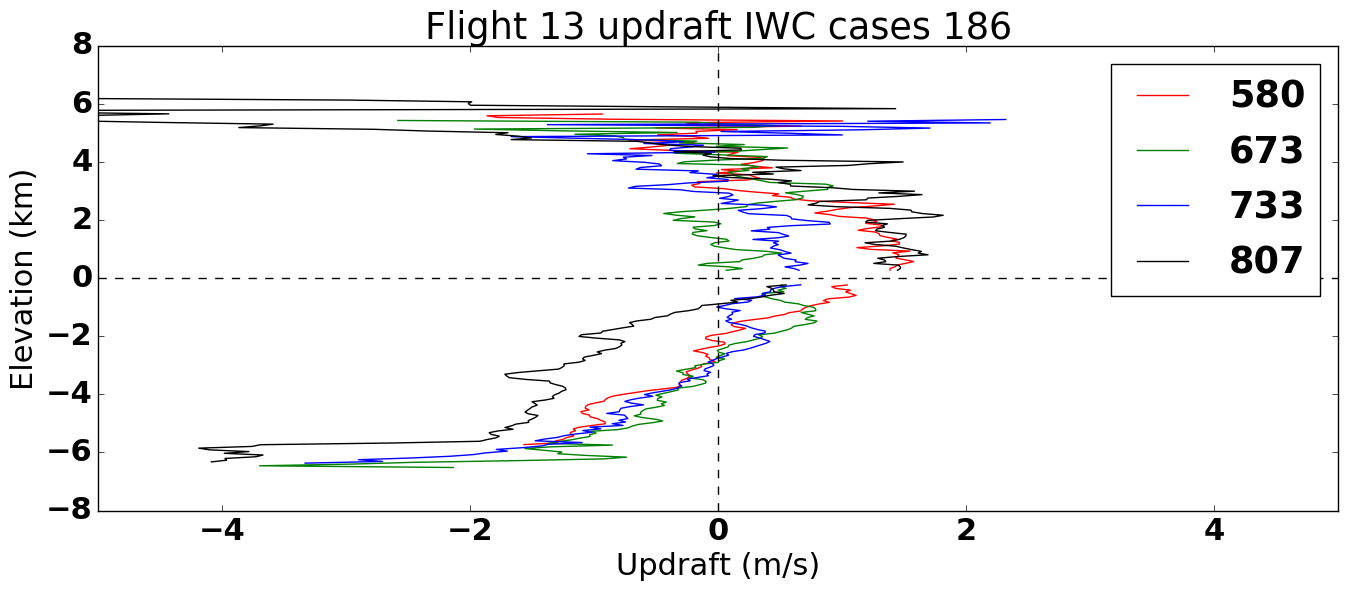

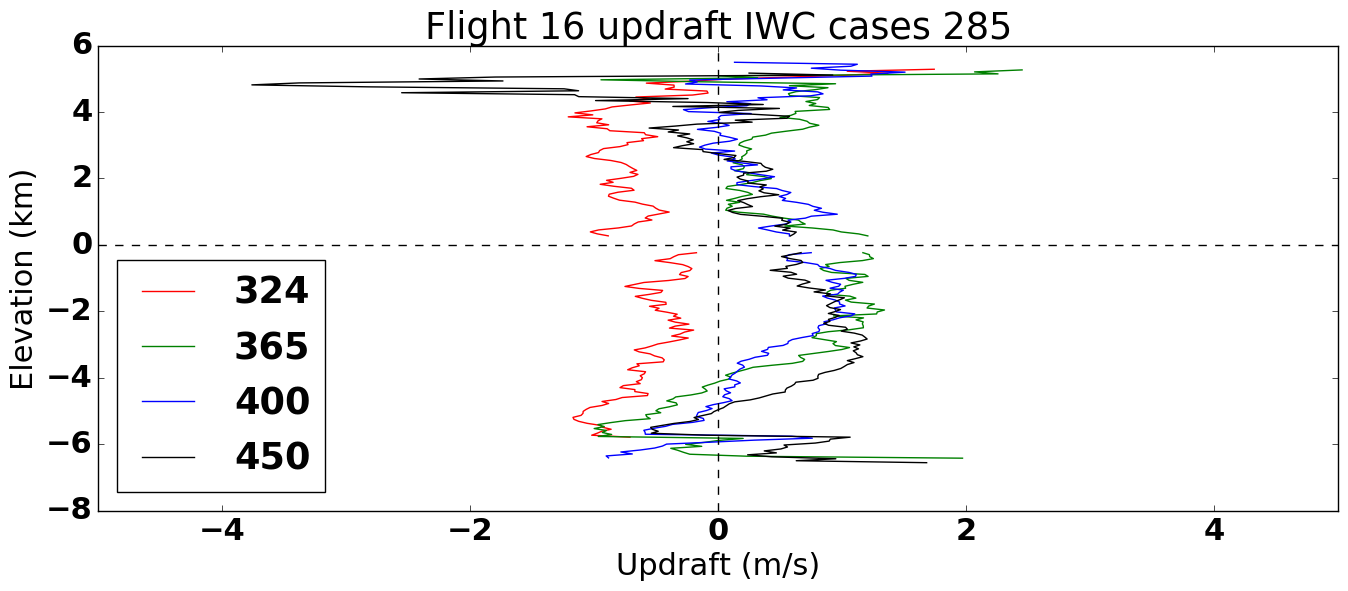

In [10]:
# grouped w wind profile by MMD cats
totaln=23
cbindbackward=cbmmd=np.zeros([0,1])
cbalt=cbupdf=np.ndarray([500,0])
# for i in range(totaln):
for i in [11,12,15]:
        szi=i+1
        
        ### For PSD data
        indflt=(raw['flightnum']==szi) & (iwc_mean>1.5)
        tmp = proc['indpsdforward'][indflt]
        tmp = tmp[~np.isnan(tmp)].astype(int)
        #### Need to convert to int otherwise float as index is not acceptable
        mmd = proc['MMD'][ tmp ]
        #### squeeze the dimension otherwise it will create a 3-D array.
        time = raw['Time'][ np.squeeze(proc['indpsdback'][tmp]) ]
        
        ### For RASTA data
        try:
            ds = loadRastaflt(szi).sel(method='nearest',time=np.squeeze(time/3600.),tolerance=1./3600)
        except:
            continue
            pass
#         updf=ds.w_ret.where((ds.Mask_Vz==1) | (ds.Mask_Vz==3))
        if np.prod(ds.w_ret.shape) == 0:
            continue;
        updf = ds.w_ret.where(ds.Mask_Vz==1).values.transpose()
        alt = ds.height_2D.values.transpose()
        if updf.ndim == 1:
            updf=updf[:,np.newaxis]
            alt=alt[:,np.newaxis]
            time=time[np.newaxis,:]
            
        alt = alt-alt[249,:]
        
        fig=figure(figsize=[16,6])
        mmdbins = np.percentile(mmd, np.arange(0,100.1,25))
        mmdind = np.digitize(mmd,mmdbins)

        tmpc=np.array(['r','g','b','k'])
        tmpmmd=np.zeros(len(mmdbins)-1)
        for j in range(1,len(mmdbins)):
            tmpind=np.in1d(mmdind,j)
            x1=updf[:,tmpind]
            y1=alt[:,tmpind]
            x0=np.nanmean(x1,axis=1)
            y0=np.nanmean(y1,axis=1)
            tmpmmd[j-1]=np.nanmean(mmd[tmpind])
        #             plot(x0,y0,c=colormapping.to_rgba(tmpmmd[j-1]))
            plot(x0,y0,c=tmpc[j-1])

        ax=plt.gca()
        ax.legend(tmpmmd.astype(int).astype(str),loc='best')
        plt.ylabel('Elevation (km)')
        plt.xlabel('Updraft (m/s)')
        plt.xlim(-5,5)
        plt.title('Flight '+str(szi)+' updraft IWC cases '+str(len(mmd)))
        plt.plot(plt.xlim(),np.array([0,0]),'k--')
        plt.plot(np.array([0,0]),plt.ylim(),'k--')
        plt.show()

In [5]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

/net/san-a1-ib/data/keeling/a/szhu28/usr/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


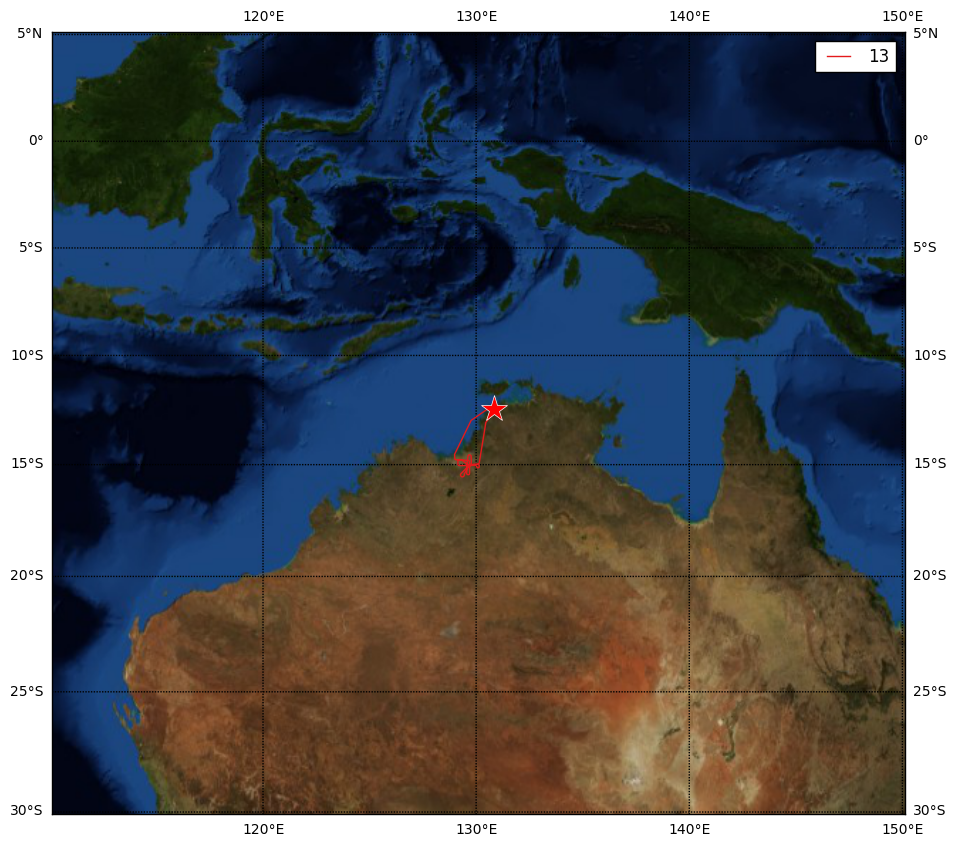

In [4]:
indflt= (iwc_mean>1.5)
tmp = proc['indpsdforward'][indflt]
tmp = tmp[~np.isnan(tmp)].astype(int)
iwc_mean.shape

plt.figure(figsize=(11,11))
loopthru=np.arange(1,24)
loopthru=np.delete(loopthru,np.array([1,5,21,11,17,20])-1)
loopthru=np.array([13])
m = Basemap(projection='merc',resolution='c',llcrnrlon=110.1,llcrnrlat=-30.1,
            urcrnrlon=150.1,urcrnrlat=5.1)
m.bluemarble()
mlon,mlat = m(raw['lon'],raw['lat'])
m.drawmeridians(np.arange(110,150.1,10),labels=[1,1,1,1])
m.drawparallels(np.arange(-30,5.1,5),labels=[1,1,1,1])
haha=mpl.cm.ScalarMappable(cmap='Set1')
_=haha.to_rgba(loopthru)

ax=list()
for szi in loopthru:
    tmpind=(raw['flightnum']==szi)# &(raw['Time']<8.4e4)
#     plt.plot( mlon[tmpind],mlat[tmpind] )
    ax.append( plt.plot( mlon[tmpind],mlat[tmpind], c=haha.to_rgba(szi) ,label=szi.astype(str)) )
    
plt.legend()
darwincoord=m(130.8456,-12.4634)
plt.plot(darwincoord[0],darwincoord[1],'r*',ms=20,markeredgecolor='w')
# m.shadedrelief()

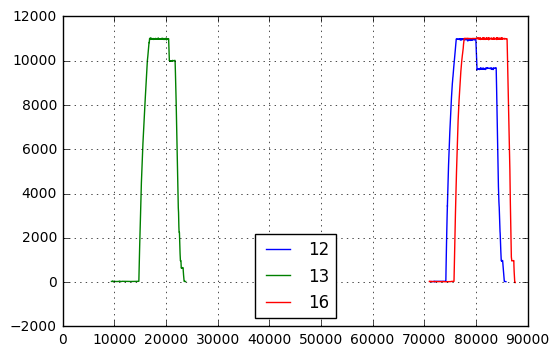

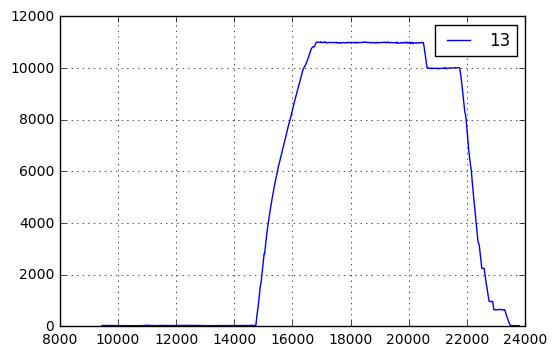

In [3]:
for szi in np.array([12,13,16]):
    tmpind=(raw['flightnum']==szi)
    #     plt.plot( mlon[tmpind],mlat[tmpind] )
    plt.plot( raw['Time'][tmpind],raw['altGPS'][tmpind],label=szi.astype(str) )
    
plt.legend(loc='best')
plt.grid(b=True)
plt.show()

for szi in np.array([13]):
    tmpind=(raw['flightnum']==szi)
    #     plt.plot( mlon[tmpind],mlat[tmpind] )
    plt.plot( raw['Time'][tmpind],raw['altGPS'][tmpind],label=szi.astype(str) )
    
plt.legend(loc='best')
plt.grid(b=True)
plt.show()

In [ ]:
# Each flight template

totaln=23
for i in range(totaln):
# for i in range(12,14):
        szi=i+1
        
        ### For PSD data
        indflt=(raw['flightnum']==szi) & (iwc_mean>1.5)
        tmp = proc['indpsdforward'][indflt]
        tmp = tmp[~np.isnan(tmp)].astype(int)
        #### Need to convert to int otherwise float as index is not acceptable
        mmd = proc['MMD'][ tmp ]
        #### squeeze the dimension otherwise it will create a 3-D array.
        time = raw['Time'][ np.squeeze(proc['indpsdback'][tmp]) ]
        
        ### For RASTA data
        try:
            ds = loadRastaflt(szi).sel(method='nearest',time=np.squeeze(time/3600.),tolerance=1./3600)
        except:
            continue
            pass

        ax=plt.gca()
        ax.legend(tmpmmd.astype(int).astype(str),loc='best')
        plt.ylabel('Altitude (km)')
        plt.xlabel('Updraft (m/s)')
        plt.title('Flight '+str(szi)+' updraft IWC cases '+str(len(mmd)))
        plt.plot(plt.xlim(),np.array([0,0]),'k--')
        plt.plot(np.array([0,0]),plt.ylim(),'k--')
        plt.show()


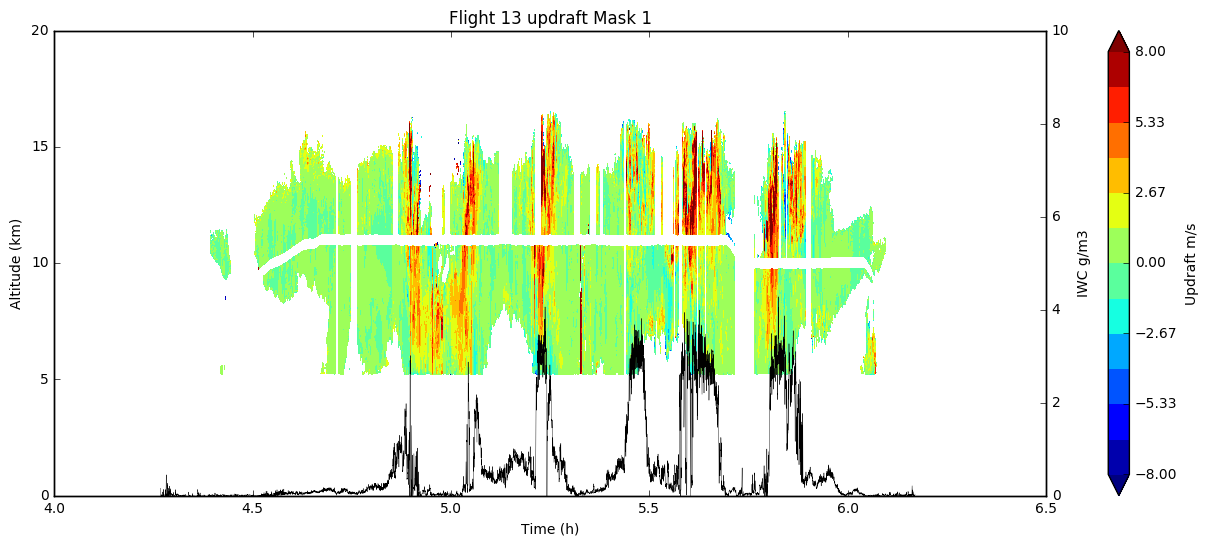

In [3]:
ds = loadRastaflt(13)
tmp=ds['w_ret']
# tmp=tmp.where((ds.Mask_Vz==1) | (ds.Mask_Vz==3))
tmp=tmp.where((ds.Mask_Vz==1))
# thresh=14
# tmp=tmp.where((tmp<thresh) & (tmp>-thresh))
tmp=tmp.transpose()
fig=plt.figure(figsize=[16,6])    ########### comment me
plt.contourf(np.tile(ds.time.values,(tmp.values.shape[0],1)),ds.height_2D.transpose(),
             tmp,np.linspace(-8,8,13),extend='both')
ax=plt.gca()
hcb=plt.colorbar()
hcb.set_label('Updraft m/s')
plt.ylim(0,20)
plt.xlabel('Time (h)')
plt.ylabel('Altitude (km)')
plt.title('Flight 13 updraft Mask 1')
ax2=ax.twinx()
indflt=(raw['flightnum']==13)
iwc=raw['TWCIKPZRgm3'][indflt]
time=raw['Time'][indflt]
ax2.plot(time/3600.,iwc,'k',linewidth=0.3)
ax2.set_ylim(0,10)
_=ax2.set_ylabel('IWC g/m3')